In [1]:
from sklearn.datasets import load_digits
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

digits = load_digits()

In [2]:
print("Image data shape", digits.data.shape)
print("Label data shape", digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


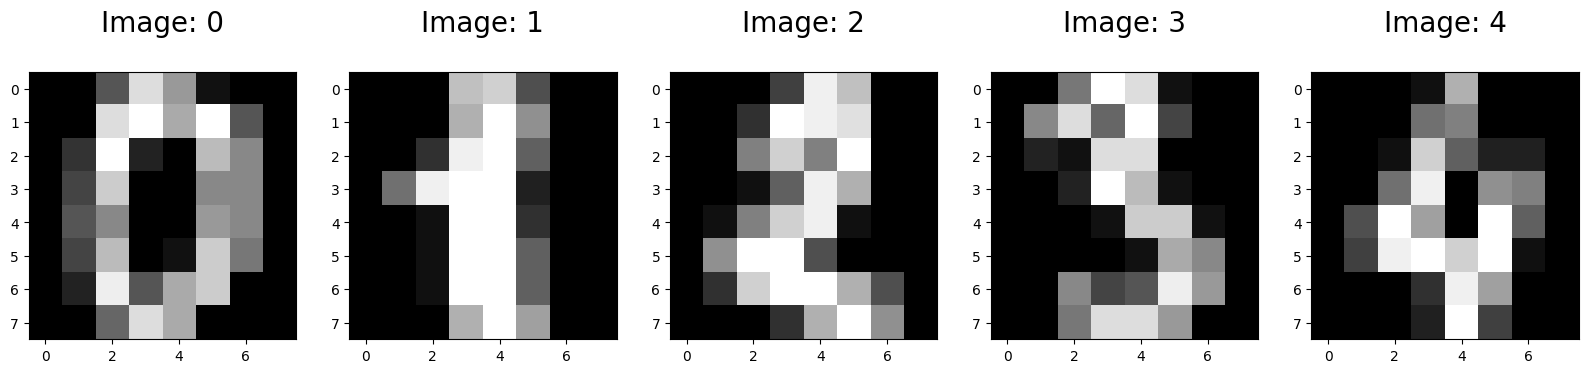

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Image: %i\n' %label, fontsize=20)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.28, random_state=2)

In [7]:
print(x_train.shape)

(1293, 64)


In [9]:
print(y_train.shape)

(1293,)


In [10]:
print(x_test.shape)

(504, 64)


In [11]:
print(y_test.shape)

(504,)


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logisticregression = LogisticRegression()
logisticregression.fit(x_train, y_train)

C:\Users\goura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
print(logisticregression.predict(x_test[0].reshape(1, -1)))

[4]


In [15]:
logisticregression.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [16]:
predictions = logisticregression.predict(x_test)

In [18]:
score = logisticregression.score(x_test, y_test)
print(score)

0.9543650793650794


In [20]:
# Create confusion metrics to know how well is your model
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[47  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  3  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  2  0  1  1  0]
 [ 0  0  0  0 42  0  0  0  2  2]
 [ 0  0  0  0  1 54  0  0  0  0]
 [ 0  1  0  0  0  0 51  0  1  0]
 [ 0  0  0  0  0  0  0 52  0  1]
 [ 0  3  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  0  1  0  0  2 38]]


Text(0.5, 1.0, 'all_sample_title')

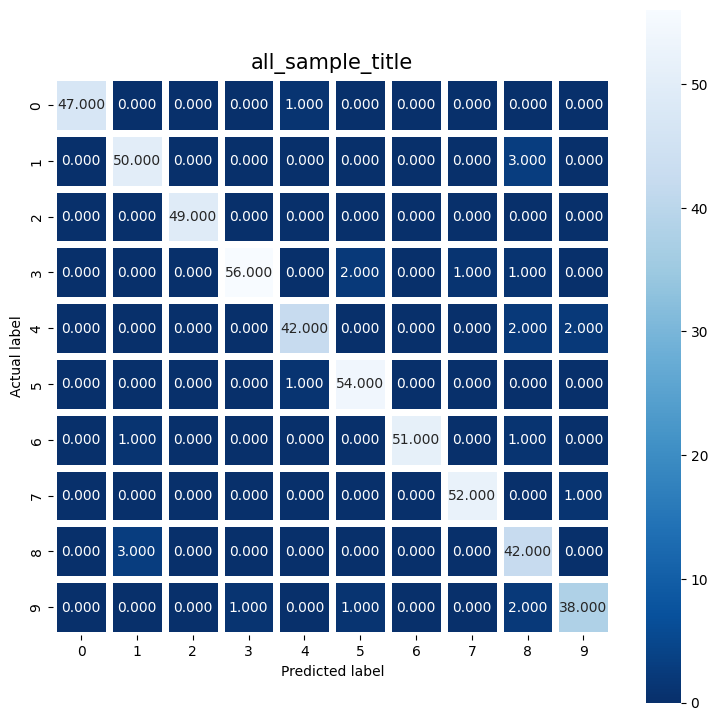

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score: {0}', format(score)
plt.title('all_sample_title', size=15)

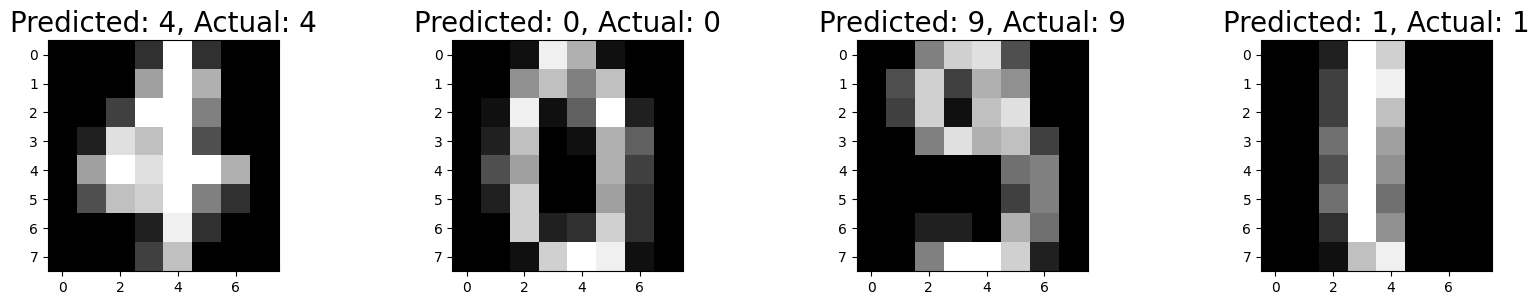

In [25]:
index = 0
classifiedindex = []
for predict, actual in zip(predictions, y_test):
 if predict == actual:
  classifiedindex.append(index)
 index+=1

plt.figure(figsize=(20, 3))
for plotindex, wrong in enumerate(classifiedindex[0:4]):
 plt.subplot(1, 4, plotindex + 1)
 plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)  
 plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20)